# Binary Pattern Dictionary Learning

We present an image processing pipeline which accepts a large number of images, containing spatial expression information for thou- sands of genes in Drosophila imaginal discs. We assume that the gene activations are binary and can be expressed as a union of a small set of non-overlapping spatial patterns, yielding a compact representation of the spatial activation of each gene. This lends itself well to further automatic analysis, with the hope of discovering new biological relation- ships. Traditionally, the images were labeled manually, which was very time consuming. The key part of our work is a binary pattern dictionary learning algorithm, that takes a set of binary images and determines a set of patterns, which can be used to represent the input images with a small error.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys
import numpy as np
from skimage import io
import matplotlib.pylab as plt
import notebooks.notebook_utils as uts

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## load datset

loading dataset: (True) exists -> /mnt/30C0201EC01FE8BC/TEMP/atomicPatternDictionary_v0/datasetFuzzy_raw
loading (True) <- /mnt/30C0201EC01FE8BC/TEMP/atomicPatternDictionary_v0/dictionary/atlas.png


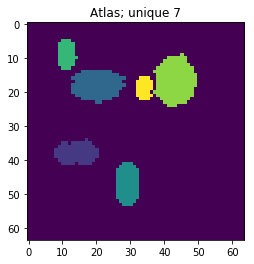

In [2]:
p_dataset = os.path.join(uts.DEFAULT_PATH, uts.SYNTH_DATASETS_PROB[0])
print ('loading dataset: ({}) exists -> {}'.format(os.path.exists(p_dataset), p_dataset))

p_atlas = os.path.join(uts.DEFAULT_PATH, 'dictionary/atlas.png')
atlas_gt = io.imread(p_atlas)
nb_patterns = len(np.unique(atlas_gt))
print ('loading ({}) <- {}'.format(os.path.exists(p_atlas), p_atlas))
plt.imshow(atlas_gt, interpolation='nearest')
_ = plt.title('Atlas; unique %i' % nb_patterns)

In [3]:
list_imgs = uts.load_dataset(p_dataset)
print ('loaded # images: ', len(list_imgs))
img_shape = list_imgs[0].shape
print ('image shape:', img_shape)

('loaded # images: ', 800)
('image shape:', (64, 64))


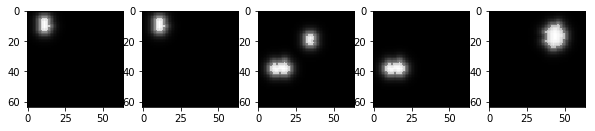

In [8]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1), plt.imshow(list_imgs[i], cmap=plt.cm.Greys_r)

## BPDL

In [9]:
from bpdl import dictionary_learning as dl
from bpdl import pattern_atlas as ptn_dict

init_atlas_msc = ptn_dict.init_atlas_mosaic(list_imgs[0].shape, 6)
# init_encode_rnd = ptn_weigth.initialise_weights_random(len(imgs), np.max(atlas))

atlas, w_bins, deforms = dl.bpdl_pipeline(list_imgs, init_atlas=init_atlas_msc, max_iter=9)

**show the estimated components - dictionary**

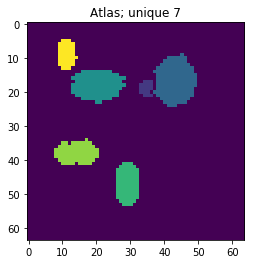

In [10]:
plt.imshow(atlas, interpolation='nearest')
_ = plt.title('Atlas; unique %i' % len(np.unique(atlas)))

**particular coding of each sample**

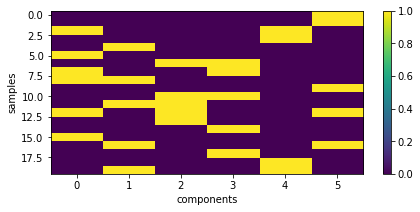

In [11]:
plt.figure(figsize=(7, 3))
plt.imshow(w_bins[:20, :], interpolation='nearest', aspect='auto'), plt.colorbar()
_= plt.xlabel('components'), plt.ylabel('samples')

**backword reconstruction from encoding and dictionary**

In [12]:
img_rct = ptn_dict.reconstruct_samples(atlas, w_bins)

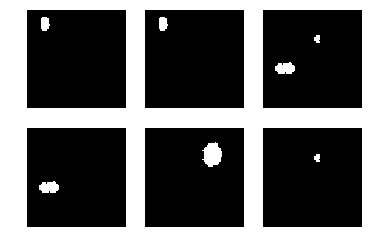

In [17]:
plt.figure(figsize=(6, 4))
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(img_rct[i], cmap=plt.cm.Greys_r), plt.axis('Off')